Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **1 hour and 30 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Simon Andren"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Mergesort and recurrences

## Question 1 [time estimate: 20 minutes]

First, please read carefully [this note](https://drive.google.com/open?id=1SfrRTKWDb6szsJENgvNF7-u2B96ecaF2), which reviews the MERGE operation in Cormen et al.

After reviewing the example above (Cormen et al., Figure 2.3),  you need to manually create similar illustrations as in the example above but this time for the input array:

![array](array.png)

For this exercise, assume that the call to the algorithm is MERGE(A, 1, 3, 6) and draw different resulting stages of the arrays A, L, and R as the merge algorithm is executed.  You can hand-draw or use any drawing tool to produce panel illustrations, as in the example above.  Include your final drawings in the cell below. Feel free to use additional cells (Markdown or Code) for this question.


Doing this prework, I originally started with the input A,1,3,6 but that would give me the arrays [2,6,7] & [8,1,4] . These two arrays are not sorted. Merging these two arrays, since 8 will always be higher than the integers in the first array, A resulted in being [2,6,7,8,1,4,6,9] which is the original unsorted array. I therefore changed and had input A,1,4,8

![array](Page1.png)
![array](Page2.png)

## Question 2 [time estimate: 5 minutes]
Now using your understanding of Part I of the merge algorithm, can you think of an efficient way to implement this part in Python? (hint: using Python lists). Give your answer in prose in the cell below.

To implement this is Python, we would start by creating two lists, L1 & L2, that would be the two half of the original array A. After that, we would add infinity to the end of each array. Now we could start building up the sorted array. This would be done by comparing the entries in the sorted sublists  to each other. First,  we would compare the first entries in each subarray to another, adding the lowest number to the first entry in the main array. We would then compare the  second entry of the sublist which had the lowest integer to the first entry of the remaining sublist, again adding the lowest number to the main array, this time to position 2. This would be repeated until the enitre main array has been iterated and filled.

## Question 3 [time estimate: 20 minutes]

Write a Python implementation of the merge pseudocode (both parts). Your Python function must take the same four input arguments as described in the $MERGE(A,p,q,r)$. Test your code by running the example in problem 1 and 2 of this pre-class work. Feel free to come up with additional cases to check if your code is working properly. Your code should return A.

In [2]:
def merge(A, p, q, r):
    
    #Finds the number of elements that should include in the first sublist.
    n1 = q - p
    #Finds the number of elements that should include in the second sublist. 
    n2 = r - q - 1
    
    #Define two empty lists that will hold the new lists
    L1 = [None for _ in range(n1+1)]
    L2 = [None for _ in range(n2+1)]
    
    #Create a list for each sublist
    for i in range(0, n1+1):
        L1[i] = A[p + i]
    for j in range(0, n2 + 1):
        L2[j] = A[q + j + 1]
    
    #Append infinity to the end of each list
    L1.append(float("inf"))
    L2.append(float("inf"))
    
    #Define the start position for the sublist comparison 
    i = 0
    j = 0

    #loops over each position in the main array, adding the lowest remaining number of the two subarray to A
    for k in range(p, r+1):
        if L1[i] <= L2[j]:
            A[k] = L1[i]
            i += 1
        else:
            A[k] = L2[j]
            j += 1
            
    return A
    raise NotImplementedError()
    

A = [2,6,7,8,1,4,6,9] 
A1 = [5,11,19,31,11,42,44,69,14] 
p = 0
q = 3
r = 7

print(merge(A, p, q, r))
print(merge(A1, p, q, r))


[1, 2, 4, 6, 6, 7, 8, 9]
[5, 11, 11, 19, 31, 42, 44, 69, 14]


In [3]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 4 [time estimate: 5 minutes]

Suppose that your Python implementation of the merge algorithm is already working. Read and comment the code for merge sort below:

In [4]:
#import pixiedust
#%pixie_debugger
def merge_sort(A,p,r):
    """ 
    Recursive algorithm that will divide a an array A into subparts until there is only 1 element left in each array.
    Calls merge which merges and sorts two subarrays  
    
    Input: 
    A = Array
    p = starting index for the first subarray
    r = ending index for the second subarray
    
    Output
    A = The sorted array A
    """
    step_count = 0
    if p < r:
        q = (p+r)//2
        step_count += 1
        
        merge_sort(A,p,q)
        step_count += 1
        
        merge_sort(A,q+1,r)
        step_count += 1
        
        merge(A,p,q,r)
        step_count += 1
        
    step_count += 1
    return(A)

A = [2,6,7,8,1,4,6,9,1,4,4,2,3,4,6,7] 
A1 = [5,11,19,31,11,42,44,69,1,4,6,3,2,5,8,12] 

print(merge_sort(A1,0,len(A1)-1))


[1, 2, 3, 4, 5, 5, 6, 8, 11, 11, 12, 19, 31, 42, 44, 69]


In [5]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 5 [time estimate: 15 minutes]
Count the number of steps and time your merge_sort() function with the following input: `list_k = [i for i in range(100*k, 0, -1)] `, where $k= 1, 2, 3, …, 15 $. If you are not familiar with what this piece of code is doing, you may want to check the "List Comprehension" section in this [Python Help Sheet](https://drive.google.com/open?id=1paW2ByiraoDQViie0gGxApRN9DKbjHGx).


In [6]:
import matplotlib.pyplot as plt
import time
time_counter = []
for k in range(1,16):
    list_k = [i for i in range(100*k, 0, -1)]
    start_time = time.time()
    merge_sort(list_k, 0, len(list_k)-1)
    time_counter.append([time.time() - start_time, 100*k])

## Question 6 [time estimate: 25 minutes] 
Use the code you wrote for Lesson "Measuring algorithms' efficiency" (i.e., selection sort, bubble sort, insertion sort). Plot the following graphs:
* **Graph 1**: 4 lines for **the number of steps** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why? 
* **Graph 2**: 4 lines for **the timing** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why?

Use as many cells as you wish (code cells or markdown cells alike) to complete this question.

You may find the section "Simple 2-Dimensional Plots in Python" in this [Python Help Sheet](https://drive.google.com/open?id=1paW2ByiraoDQViie0gGxApRN9DKbjHGx) helpful.

Text(0,0.5,'Runtime')

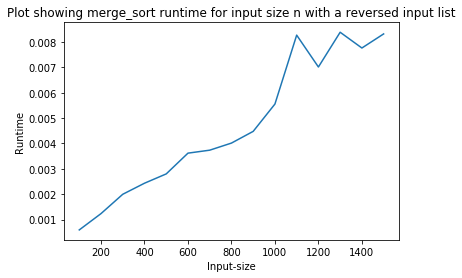

In [7]:
import matplotlib.pyplot as plt
import time
time_counter = []
for k in range(1,16):
    list_k = [i for i in range(100*k, 0, -1)]
    start_time = time.time()
    merge_sort(list_k, 0, len(list_k)-1)
    time_counter.append([time.time() - start_time, 100*k])

x = [time_counter[i][1] for i in range(len(time_counter))]
y = [time_counter[i][0]for i in range(len(time_counter))]

plt.plot(x,y)
#raise NotImplementedError()
plt.title("Plot showing merge_sort runtime for input size n with a reversed input list")
plt.xlabel("Input-size")
plt.ylabel("Runtime")

In [8]:
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np

def generate_inputs(type_input, N, interval):
    '''
    This function generates data of size 1..N in the format of the inputted 'type_input' variable.
    --------
    Inputs:
    -type_input: options are 'Sorted', 'Reversed' or 'Random' that indicate the format of the data generated
    -N: maximum size of input list
    -interval: interval of sizes for the elements on the list
    Outputs:
    -A list of lists to be sorted
    '''
    data = []
    for i in range(0, N+1, interval):
        if type_input == 'Reversed':
            data.append([j for j in range(i,0,-1)])
        elif type_input == 'Random': 
            data.append([random.randint(1,1000) for j in range(i)])
        ## uncomment the following line of code for Q2
        #elif type_input == 'Sorted':
            ## your code here
        else:
            raise ValueError('This is an unsupported type_input; please try again.')
    return data


In [9]:
def plot_histogram_data(input_size, runtimes, confidence_interval, n_bins, 
                        sorting_algorithm):
            '''
            This function plots the histogram of runtime.
            --------
            Inputs:
            -input_size: input size of the data to be sorted
            -runtimes: list of each runtime for sorting the data
            -confidence_interval: the confidence interval to be included in the histogram
            -n_bins: number of bins in the histogram
            -sorting_algorithm: algorithm function that is being analyzed
            Output:
            -A histogram of the runtimes (there will be input_size of these)
            '''
            fig, ax = plt.subplots()
            plt.hist(runtimes, bins=n_bins, alpha=0.6)
            lower_bound = np.quantile(runtimes, (1/2)*(1-confidence_interval/100))
            upper_bound = np.quantile(runtimes, (1/2)*(1+confidence_interval/100))
            plt.axvline(x=lower_bound, color='green', linestyle ='--')
            plt.axvline(x=upper_bound, color='green', linestyle ='--', 
                        label=str(int(confidence_interval))+'% CI')
            mu = np.mean(runtimes)
            plt.axvline(x=mu, color='forestgreen', linewidth=3, label = 'mean')
            median = np.median(runtimes)
            sigma = np.std(runtimes)
            textstr = '\n'.join(
                ['mean: '+"{:f}s".format(round(mu, 5)),
                 'std: '+"{:f}s".format(round(sigma, 5)),
                 'median: '+"{:f}s".format(round(median, 5))
                ]
            )
            # place a text box in upper left in axes coords
            plt.annotate(textstr, xy=(1.05, 0.8), xycoords='axes fraction')
            plt.legend(loc='upper right')
            #plt.grid()
            plt.ylabel('Frequency')
            plt.xlabel('Run Time (s)')
            plt.title(f'Runtime Distribution N={input_size} - {sorting_algorithm}')
            plt.show()
            
            
            
def compare_algorithms(data, sorting_algorithms_list, 
                       n_runs, 
                       plot_steps = False, plot_runtime = False, 
                       plot_histogram_runtime = False, 
                       histogram_input_size = 1000, n_bins = 30, confidence_interval=95):
    """
    This function plots the histograms, number of steps and/or runtimes taken by completing 
    different sorting algorithms.
    --------
    Inputs:
    -data: list of lists with varying size, e.g. [[0, 1], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5]]
    -sorting_algorithms_list: list of algorithm functions
    -plot_steps: binary; if True it will produce a lineplot for the number of steps 
     for all the algorithms as a function of input size
    -plot_runtime: binary; if True it will produce a lineplot for the runtime for all the 
     algorithms as a function of input size
    -plot_histogram_runtime: binary; if True it will produce a histogram for the runtime 
     as a function of input size
    -histogram_input_size: data input size for which the histogram will be plotted (default=1000)
    -n_bins: number of bins to include in the histogram (default: 30)
    -confidence_interval: confidence interval to include in the histograms and plots
    
    Outputs:
    - Plot of the histogram, number of steps and/or runtimes for all the 
    algorithms included in sorting_algorithms_list
    as a function of the input size
    """
    sorting_data = {}
    
    for ele in data[1:]:
        for algo in sorting_algorithms_list:
            if algo.__name__ not in sorting_data.keys():
                sorting_data[algo.__name__] = {}
                sorting_data[algo.__name__][len(ele)] = {}
                temp_list = []
                for experiments in range(n_runs):
                    start = time.time()
                    el1 = ele.copy()
                    steps = algo(el1)
                    temp_list.append(time.time() - start)
                sorting_data[algo.__name__][len(ele)]['data'] = temp_list
                sorting_data[algo.__name__][len(ele)]['steps'] = steps
            else:
                sorting_data[algo.__name__][len(ele)] = {}
                temp_list = []
                for experiments in range(n_runs):
                    start = time.time()
                    el1 = ele.copy()
                    steps = algo(el1)
                    temp_list.append(time.time() - start)
                sorting_data[algo.__name__][len(ele)]['data'] = temp_list
                sorting_data[algo.__name__][len(ele)]['steps'] = steps
        
        if plot_histogram_runtime and len(ele) == histogram_input_size:
            for algo in sorting_algorithms_list:
                plot_histogram_data(len(ele), sorting_data[algo.__name__][len(ele)]['data'], 
                                    confidence_interval, n_bins, algo.__name__)                               
                plt.show()
    if plot_steps:
        for algo in sorting_data.keys():
            x_data = sorted(list(sorting_data[algo]))
            y_data = [sorting_data[algo][x]['steps'] for x in x_data]
            plt.plot(x_data, y_data, '--', label=algo)
        plt.xlabel('Input size')
        plt.ylabel('Steps')
        plt.legend(loc='upper left')
        plt.title('Scaling of Sorting Algorithms - Steps', fontweight='bold')
        plt.show()
 
    if plot_runtime:
        for algo in sorting_data.keys():
            x_data = sorted(list(sorting_data[algo]))
            y_data = [np.mean(sorting_data[algo][x]['data']) for x in x_data]
            y_lower = [np.quantile(sorting_data[algo][x]['data'], (1/2)*(1-confidence_interval/100)) for x in x_data]
            y_upper = [np.quantile(sorting_data[algo][x]['data'], (1/2)*(1+confidence_interval/100)) for x in x_data]
            ax = sns.lineplot(x_data, y_data, label=algo) 
            ax.fill_between(x_data, y_lower, y_upper, alpha=0.3)
        plt.xlabel('Input size')
        plt.ylabel('Time (s)')
        plt.legend(loc='upper left')
        plt.title('Scaling of Sorting Algorithms - Time (s)', fontweight='bold')
        plt.show()
    return None

AttributeError: module 'numpy' has no attribute 'quantile'

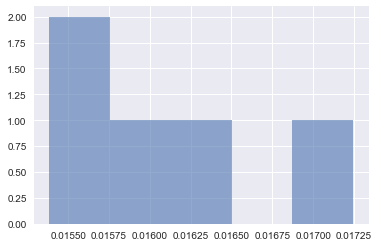

In [14]:
N = 500
n_runs = 5
confidence_level = 95
type_of_input_data = 'Random'
sorting_algorithms = [selection_sort, insertion_sort, bubble_sort]




input_data = generate_inputs(type_input=type_of_input_data, 
                             N=N, 
                             interval=N//20)


compare_algorithms(data=input_data, sorting_algorithms_list=sorting_algorithms, 
                   n_runs=n_runs, plot_steps=False, plot_runtime=False, 
                   plot_histogram_runtime=True, 
                   histogram_input_size=N, n_bins=n_runs,
                   confidence_interval=confidence_level)

In [11]:
def insertion_sort(A):
    Step_Count = 0
    for j in range(1, len(A)):
        Step_Count += 1
        
        key = A[j]
        Step_Count += 1
        
        i= j-1
        Step_Count += 1
        
        while i >= 0 and A[i]>key:
            
            A[i+1] = A[i]
            Step_Count += 1
            
            i -= 1
            Step_Count += 1
        
        Step_Count += 1
        
        A[i+1] = key
        Step_Count += 1
        
    return Step_Count
    raise NotImplementedError()

In [12]:
def bubble_sort(A):
    Step_Count = 0
    
    for i in range(0 , len(A)-1): #Loops over all the items in A (i = 0 to len(A)-1)
        Step_Count += 1
        
        for j in range(len(A)-1, i, -1): #Loops backward from the last entry to the entry before the sorted items
            Step_Count += 1
            
            if A[j] < A[j-1]: #If the item to the left is bigger, swap places
                
                A[j], A[j-1] = A[j-1], A[j]
                Step_Count += 1
            
            Step_Count += 1 #Adds 1 to the step_counter both if it has been "triggered" & if it didn't get 'triggered"
    
    return Step_Count
    raise NotImplementedError()

In [13]:
def selection_sort(A):
    Step_Count = 0
    
    n = len(A)
    Step_Count += 1
    
    for i in range(0, n-2): #Loops through all elements except the last one
        Step_Count += 1
        
        minidx = i #The index of the smalles number is set to i
        Step_Count += 1
        
        for j in range(i, n): #Loops though all the elements from i to the last element
            Step_Count += 1
            
            if A[j] < A[minidx]: #If the value of the current element is less that the value of the current minimum value
                
                minidx = j #assign the current element index to minidx
                Step_Count += 1
            
            Step_Count += 1                
        
        A[i], A[minidx] = A[minidx], A[i] #Swaps the elements so the lowest value is in the last element in the sorted sectoin
        Step_Count += 1
    
    return Step_Count
    raise NotImplementedError()